# 1. Logistic Regression

사용 예시
* 시험을 봤는데 이 시험 점수가 합격인지 불합격인지가 궁금함
* 어떤 메일을 받았을 때 이게 정상 메일인지 스팸 메일인지를 분류하는 문제

이렇게 둘 중 하나를 결정하는 문제를 이진 분류(Binary Classification)라고 한다. 그리고 이런 문제를 풀기 위한 대표적인 알고리즘으로 로지스틱 회귀(Logistic Regression)가 있다.

## 이진 분류: Binary Classification
* 둘 중 하나의 선택지 중에서 정답을 고르는 이진 분류 문제는 직선으로 표현하는 것이 적절하지 않다.
* 학생들이 시험 성적에 따라서 합격, 불합격이 기재된 데이터가 있다고 가정해본다. 시험 성적이 x라면, 합불 결과는 y이다 이 데이터로부터 특정 점수를 얻었을 때의 합격, 불합격 여부를 판정하는 모델을 만들고자 한다.
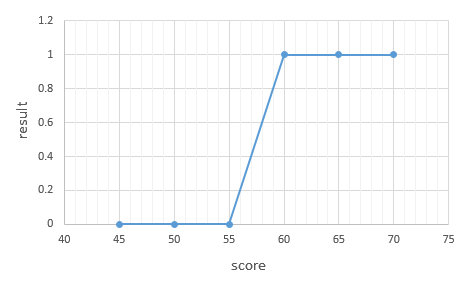

* 점들을 표현하는 그래프는 알파벳의 S자 형태로 표현
* 직선을 표현하는 함수가 아니라 S자 형태로 표현할 수 있는 함수가 필요
* 출력이 0과 1사이의 값을 가지면서 S자 형태로 그려지는 함수로 시그모이드 함수(Sigmoid function)가 있다.

## 시그모이드 함수: Sigmoid function
* 시그모이드 함수를 그래프로 시각화

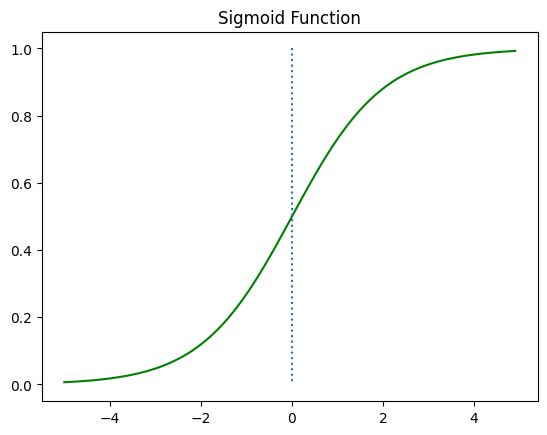

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

# 실습하기

## Logistic Regression으로 폐암의 양성 음성 분류

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

In [3]:
# Data
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [4]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
cancer["target_names"]

array(['malignant', 'benign'], dtype='<U9')

In [6]:
data, target = cancer["data"], cancer["target"]


In [7]:
data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [8]:
target[0]

0

In [9]:
# data EDA

df = pd.DataFrame(data, columns=cancer["feature_names"])
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
# 양성과 음성의 비율
pd.Series(target).value_counts()

1    357
0    212
dtype: int64

(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

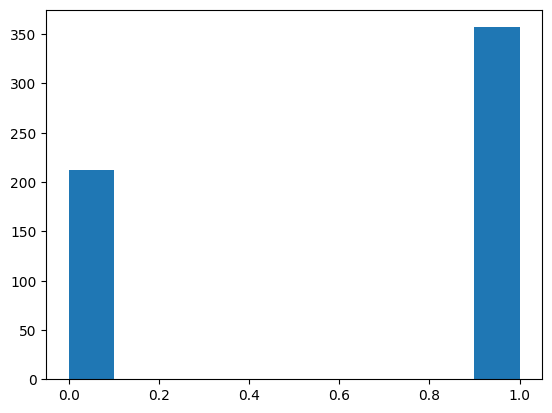

In [11]:
plt.hist(target)

Text(0, 0.5, 'target')

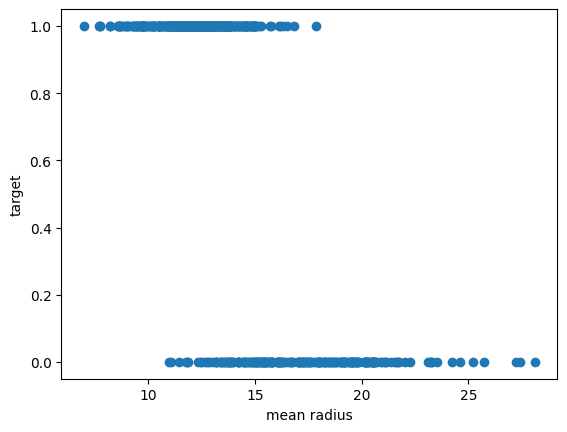

In [12]:
# mean radius와 정답간의 상관관계를 plot으로 그려보기
# mean radius가 클 경우 음성인 것

plt.scatter(x=data[:,0], y=target)
plt.xlabel("mean radius")
plt.ylabel("target")

In [13]:
# data split
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021,
)

In [14]:
print("train data 개수:", len(train_data))
print("test data 개수:", len(test_data))

train data 개수: 398
test data 개수: 171


In [15]:
# Linear Regression and Categorical Label
# 먼저, Linear Regression으로 학습할 경우 어떻게 되는지 확인
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()

In [16]:
linear_regressor.fit(train_data, train_target)

LinearRegression()

In [17]:
# 예측
train_pred = linear_regressor.predict(train_data)
test_pred = linear_regressor.predict(test_data)

In [18]:
train_pred[:10]
# 예측한 결과를 보면 0~1사이를 벗어난 예측값을 많이 볼 수 있다.

array([ 0.65079698, -0.33739828,  0.76995559,  1.07473181,  0.98981797,
       -0.14066351,  0.91330917,  0.56950769,  1.12592692,  1.08459606])

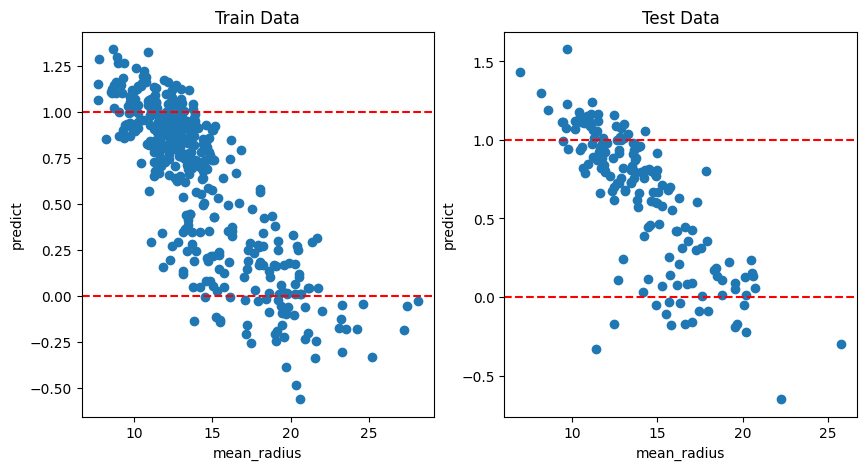

In [19]:
# 시각화
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

preds = [
    ("Train", train_data, train_pred),
    ("Test", test_data, test_pred),
]
for idx, (name, d, pred) in enumerate(preds):
    ax = axes[idx]
    ax.scatter(x=d[:,0], y=pred)
    ax.axhline(0, color="red", linestyle="--")
    ax.axhline(1, color="red", linestyle="--")
    ax.set_xlabel("mean_radius")
    ax.set_ylabel("predict")
    ax.set_title(f"{name} Data")

# mean_radius의 값에 변화에 따른 예측한 결과를 시각화하면 다음과 같다.
# 전체적으로 우하향하는 예측을 하는 것을 알 수 있다.

In [20]:
train_pred_label = list(map(int, (train_pred > best_thresh)))
test_pred_label = list(map(int, (test_pred > best_thresh)))

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score


linear_train_accuracy = accuracy_score(train_target, train_pred_label)
linear_test_accuracy = accuracy_score(test_target, test_pred_label)

In [ ]:
print(f"Train accuracy is : {linear_train_accuracy:.2f}")
print(f"Test accuracy is : {linear_test_accuracy:.2f}")

In [ ]:
# Logistic Regression
## Scaling
# Logistic Regression은 학습하기에 앞서 학습시킬 데이터를 정규화해야 한다.
# Logistic Regressiond에는 exp가 있는데, exp는 값이 클 경우 overflow가 일어날 수 있기 때문

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaler.fit(train_data)

In [ ]:
# 학습된 scaler로 train/ test 데이터를 변환

scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [ ]:
# 학습
from sklearn.linear_model import LogisticRegression

logit_regressor = LogisticRegression()
logit_regressor.fit(scaled_train_data, train_target)

In [ ]:
#예측
train_pred = logit_regressor.predict(scaled_train_data)
test_pred = logit_regressor.predict(scaled_test_data)

In [ ]:
train_pred[:10]

In [ ]:
train_pred_logit = logit_regressor.predict_proba(scaled_train_data)
test_pred_logit = logit_regressor.predict_proba(scaled_test_data)

In [ ]:
train_pred_logit[:10]

In [ ]:
train_pred_logit[0]

In [ ]:
# 평가
train_pred_logit = train_pred_logit[:, 1]
test_pred_logit = test_pred_logit[:, 1]

train_pred_logit[0]

In [ ]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, threshold = roc_curve(train_target, train_pred_logit)
auroc = auc(fpr, tpr)

In [ ]:
plt.plot(fpr, tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")

In [ ]:
print(f"AUROC : {auroc:.4f}")

In [ ]:
J = tpr - fpr
idx = np.argmax(J)
best_thresh = threshold[idx]

print(f"Best Threshold is {best_thresh:.4f}")
print(f"Best Threshold's sensitivity is {tpr[idx]:.4f}")
print(f"Best Threshold's specificity is {1-fpr[idx]:.4f}")
print(f"Best Threshold's J is {J[idx]:.4f}")

In [ ]:
plt.plot(fpr, tpr)
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
plt.plot((fpr[idx],fpr[idx]), (fpr[idx], tpr[idx]), color="red", linestyle="--")
plt.xlabel("fpr")
plt.ylabel("tpr")

In [ ]:
plt.scatter(x=scaled_train_data[:,0], y=train_pred_logit)
plt.axhline(best_thresh, color="blue")
plt.axhline(0, color="red", linestyle="--")
plt.axhline(1, color="red", linestyle="--")
plt.xlabel("mean radius")
plt.ylabel("Probability")

In [ ]:
train_pred_label = list(map(int, (train_pred_logit > best_thresh)))
test_pred_label = list(map(int, (test_pred_logit > best_thresh)))

In [ ]:
proba_train_accuracy = accuracy_score(train_target, train_pred_label)
proba_test_accuracy = accuracy_score(test_target, test_pred_label)

In [ ]:
print(f"Train accuracy is : {proba_train_accuracy:.2f}")
print(f"Test accuracy is : {proba_test_accuracy:.2f}")

In [ ]:
#정확도 확인하기

train_accuracy = accuracy_score(train_target, train_pred)
test_accuracy = accuracy_score(test_target, test_pred)

print(f"Train accuracy is : {train_accuracy:.2f}")
print(f"Test accuracy is : {test_accuracy:.2f}")

In [ ]:
print(f"Linear Regression Test Accuracy: {linear_test_accuracy:.2f}")
print(f"Logistic Regression predict_proba Test Accuracy: {proba_test_accuracy:.2f}")
print(f"Logistic Regression predict Test Accuracy: {test_accuracy:.2f}")

## Iris 종류 분류(Multiclass)

class가 여러개인 데이터를 ogistic Regression으로 예측

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2021)

In [24]:
# data load

from sklearn.datasets import load_iris

iris = load_iris()

iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [26]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [27]:
data, target = iris["data"], iris["target"]

In [28]:
# data EDA
pd.DataFrame(data, columns=iris["feature_names"]).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
#종류별 개수
pd.Series(target).value_counts()

0    50
1    50
2    50
dtype: int64

In [30]:
# data split
from sklearn.model_selection import train_test_split


train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021
)

In [31]:
print("train data 개수:", len(train_data))
print("train data 개수:", len(test_data))

train data 개수: 105
train data 개수: 45


In [32]:
# train, test data의 정답 개수 확인
print(pd.Series(train_target).value_counts())
print(pd.Series(test_target).value_counts())

2    38
1    34
0    33
dtype: int64
0    17
1    16
2    12
dtype: int64


In [33]:
# 데이터에 label을 넣어주어 원본 데이터의 정답 분포를 반영하여 데이터를 split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021, stratify=target
)


In [34]:
pd.Series(train_target).value_counts()

0    35
2    35
1    35
dtype: int64

In [35]:
pd.Series(test_target).value_counts()

0    15
2    15
1    15
dtype: int64

(1.5, 4.9)

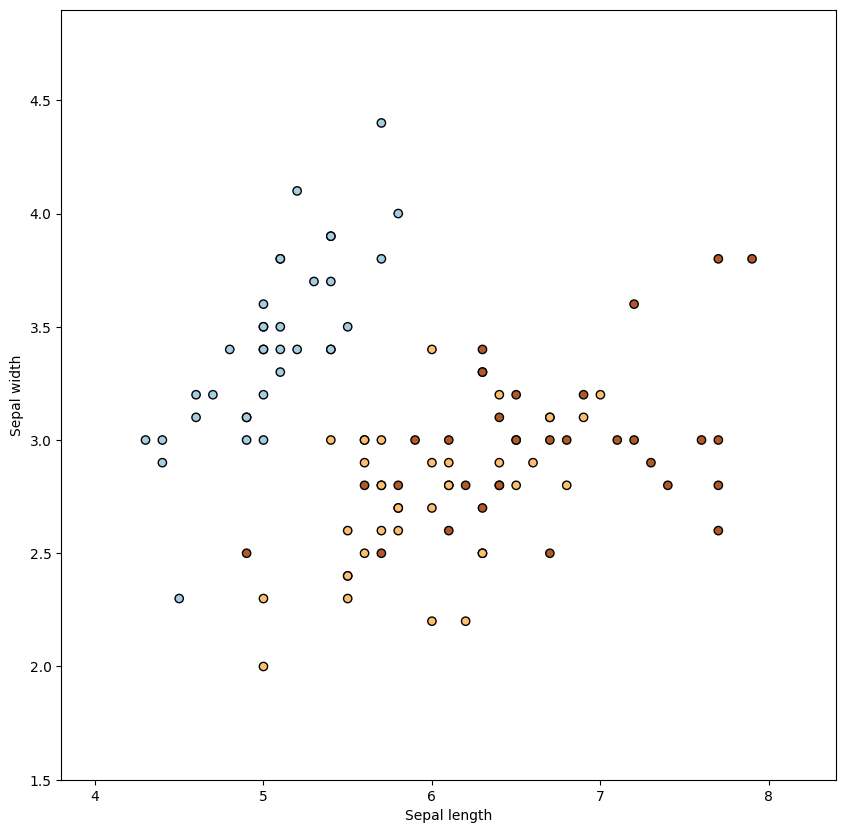

In [36]:
# multiclass
from sklearn.linear_model import LogisticRegression

# 시각화를 위해 Sepal length와 Sepal width만 사용
X = train_data[:, :2]

plt.figure(1, figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=train_target, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(X[:,0].min()-0.5, X[:,0].max()+0.5)
plt.ylim(X[:,1].min()-0.5, X[:,1].max()+0.5)

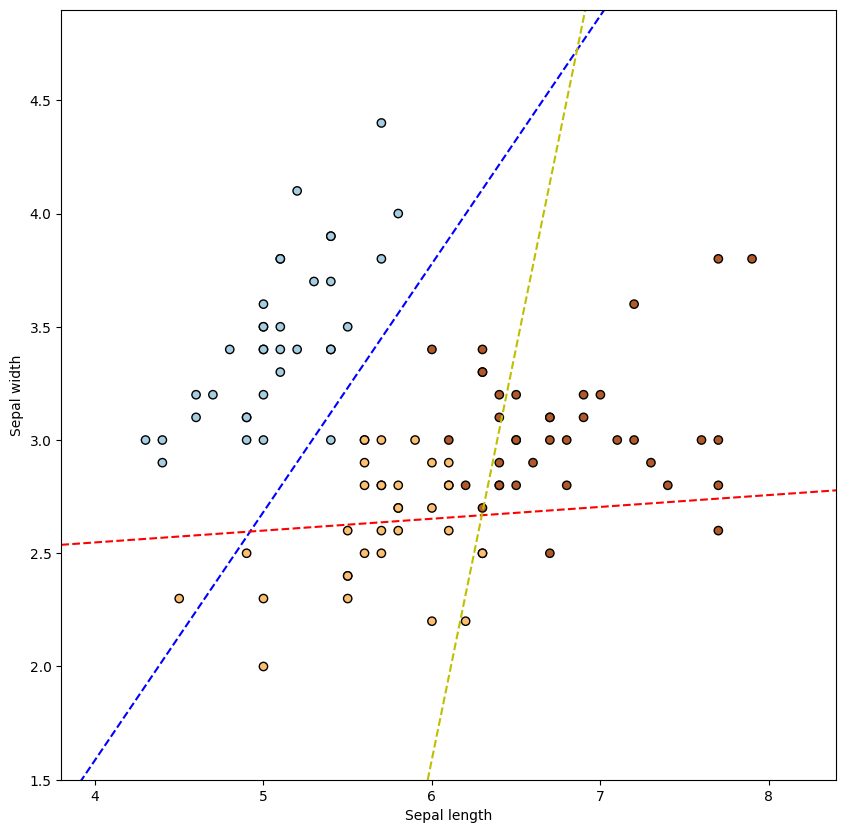

In [37]:
# One vs Rest 방법의 Logistic Regression을 학습
ovr_logit = LogisticRegression(multi_class="ovr")
ovr_logit.fit(X, train_target)

x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

plt.figure(1, figsize=(10, 10))

plt.scatter(X[:, 0], X[:, 1], c=ovr_logit.predict(X), edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

coef = ovr_logit.coef_
intercept = ovr_logit.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
    plt.plot([x_min, x_max], [line(x_min), line(x_max)],
             ls="--", color=color)

for i, color in zip(ovr_logit.classes_, "bry"):
    plot_hyperplane(i, color)

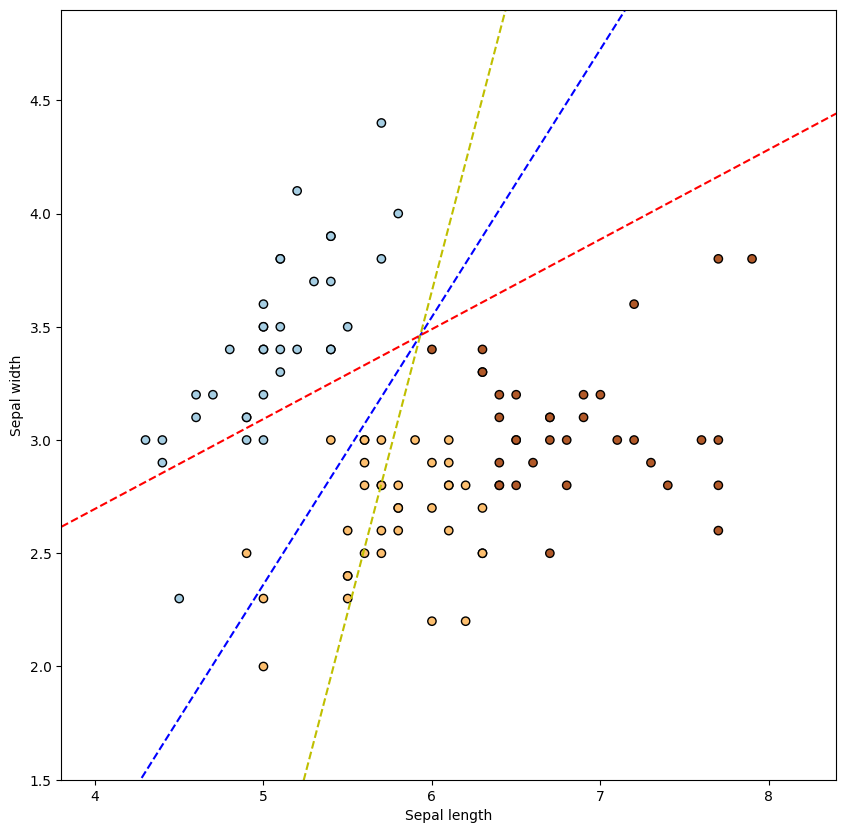

In [38]:
# Multinomial

multi_logit = LogisticRegression(multi_class="multinomial")
multi_logit.fit(X, train_target)

x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

plt.figure(1, figsize=(10, 10))

plt.scatter(X[:, 0], X[:, 1], c=multi_logit.predict(X), edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

coef = multi_logit.coef_
intercept = multi_logit.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
    plt.plot([x_min, x_max], [line(x_min), line(x_max)],
             ls="--", color=color)

for i, color in zip(multi_logit.classes_, "bry"):
    plot_hyperplane(i, color)

In [39]:
# Logistic Regression (Multinomial)

multi_logit = LogisticRegression()

In [40]:
# 학습
multi_logit.fit(train_data, train_target)

#예측
train_pred_proba = multi_logit.predict_proba(train_data)

sample_pred = train_pred_proba[0]
sample_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([9.49673805e-01, 5.03248024e-02, 1.39211469e-06])

In [41]:
print(f"class 0에 속하지 않을 확률: {1 - sample_pred[0]:.4f}")
print(f"class 1과 2에 속할 확률: {sample_pred[1:].sum():.4f}")

class 0에 속하지 않을 확률: 0.0503
class 1과 2에 속할 확률: 0.0503


In [42]:
train_pred = multi_logit.predict(train_data)
test_pred = multi_logit.predict(test_data)

In [43]:
# 평가
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(train_target, train_pred)
test_acc = accuracy_score(test_target, test_pred)

print(f"Train accuracy is : {train_acc:.2f}")
print(f"Test accuracy is : {test_acc:.2f}")

Train accuracy is : 0.98
Test accuracy is : 0.91


In [44]:
# Logistic Regression (OVR)
ovr_logit = LogisticRegression(multi_class="ovr")

# 학습
ovr_logit.fit(train_data, train_target)

LogisticRegression(multi_class='ovr')

In [45]:
# 예측
ovr_train_pred = ovr_logit.predict(train_data)
ovr_test_pred = ovr_logit.predict(test_data)

In [46]:
# 평가
from sklearn.metrics import accuracy_score

ovr_train_acc = accuracy_score(train_target, ovr_train_pred)
ovr_test_acc = accuracy_score(test_target, ovr_test_pred)

print(f"One vs Rest Train accuracy is : {ovr_train_acc:.2f}")
print(f"One vs Rest Test accuracy is : {ovr_test_acc:.2f}")

One vs Rest Train accuracy is : 0.95
One vs Rest Test accuracy is : 0.93
